# **Project Name** - Zomato Restaurant Clustering and Sentiment Analysis

## **Project Type** - Unsupervised Machine Learning
## **Contribution** - Individual
## **Team Member -** Yashraj Pillay

# **Project Summary -**


Zomato is a leading global restaurant aggregator and food delivery company that provides information, menus, and user reviews of restaurants. As the Indian restaurant industry continues to evolve with a growing number of dining options, it has become increasingly challenging for stakeholders—both customers and the company—to navigate this vast landscape. Customers often struggle to find the best restaurants that suit their specific preferences (e.g., budget, cuisine, or ambiance), while the company needs to categorize partners effectively to optimize marketing strategies and improve service quality.

This project focuses on analyzing Zomato's restaurant data to solve these challenges through Unsupervised Machine Learning and Natural Language Processing (NLP). The core objective is twofold: first, to perform **Restaurant Clustering**, grouping restaurants into distinct market segments based on key features like Cost, Rating, and Cuisine; and second, to conduct **Sentiment Analysis** on customer reviews to understand the underlying emotions (Positive, Negative, or Neutral) behind the star ratings.

The project begins with extensive **Data Wrangling** and **Exploratory Data Analysis (EDA)**. We analyze two major datasets: restaurant metadata (cost, location, cuisine) and customer reviews. We handle missing values, clean noisy text data, and merge datasets to create a comprehensive view of each restaurant. Visualizations are used to uncover patterns, such as the relationship between price and quality, the popularity of specific cuisines, and user engagement trends over time.

For the **Machine Learning** component, we employ **K-Means Clustering**. By analyzing features like 'Average Cost for Two' and 'Aggregate Rating', we segment the restaurants into clusters (e.g., "Budget-Friendly/High Rated" vs. "Premium/Low Rated"). The optimal number of clusters is determined using the Elbow Method. Additionally, we implement **Sentiment Analysis** using NLP techniques to process thousands of text reviews. This allows us to quantify customer satisfaction beyond just the 1-5 star rating, providing deeper insights into what drives customer loyalty or dissatisfaction (e.g., service quality vs. food taste).

The final outcome of this project is a set of actionable business insights. These insights help customers identify "hidden gems" (low cost, high quality) and enable Zomato to tailor its recommendations and support services to specific restaurant clusters, ultimately driving growth and user satisfaction.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statement**

The rapid growth of the restaurant industry in India has led to an explosion of choices for consumers, making it difficult to identify the best dining options in a specific locality. Simultaneously, Zomato needs to categorize its restaurant partners efficiently to provide personalized recommendations and identify areas for business improvement.

**The key challenges addressed in this project are:**

1.  **Customer Segmentation (Clustering):** The vast number of restaurants makes it hard to distinguish between different market segments. We need to cluster restaurants into groups (e.g., "Affordable & Good," "Expensive & Average") to help users make easier decisions and help Zomato target the right audience.
2.  **Sentiment Understanding:** A simple star rating (1-5) does not capture the full customer experience. We need to analyze the text reviews to determine the actual sentiment (Positive/Negative) and identify specific aspects (like service or hygiene) that drive these sentiments.
3.  **Business Insights:** Identifying the relationship between Cost, Cuisine, and Customer Ratings to answer questions like: "Do expensive restaurants always provide better service?" or "Which cuisines are most popular yet underrated?"

**Goal:** Build a Clustering Model to segment restaurants and a Sentiment Analysis system to classify customer feedback, providing strategic insights for both Zomato and its users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
%%capture
# Install all required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn textblob plotly

# Download the necessary language data for TextBlob (Sentiment Analysis)
!python -m textblob.download_corpora

In [2]:
%%capture
!python -m textblob.download_corpora
# The % ensures it installs in the CURRENT kernel
%pip install textblob

### Import Libraries

In [3]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For Sentiment Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")

### Dataset Loading

In [4]:
# Load Dataset
meta_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [5]:
# Dataset First Look
print("--- Metadata (First 5 Rows) ---")
display(meta_df.head())
print("\n--- Reviews (First 5 Rows) ---")
display(reviews_df.head())

--- Metadata (First 5 Rows) ---


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."



--- Reviews (First 5 Rows) ---


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Metadata Shape: {meta_df.shape}")
print(f"Reviews Shape: {reviews_df.shape}")

Metadata Shape: (105, 6)
Reviews Shape: (10000, 7)


### Dataset Information

In [7]:
# Dataset Info
print("--- Metadata Info ---")
print(meta_df.info())
print("\n--- Reviews Info ---")
print(reviews_df.info())

--- Metadata Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
None

--- Reviews Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int6

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"Duplicates in Metadata: {meta_df.duplicated().sum()}")
print(f"Duplicates in Reviews: {reviews_df.duplicated().sum()}")

Duplicates in Metadata: 0
Duplicates in Reviews: 36


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("--- Missing Values in Metadata ---")
print(meta_df.isnull().sum())
print("\n--- Missing Values in Reviews ---")
print(reviews_df.isnull().sum())


--- Missing Values in Metadata ---
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

--- Missing Values in Reviews ---
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


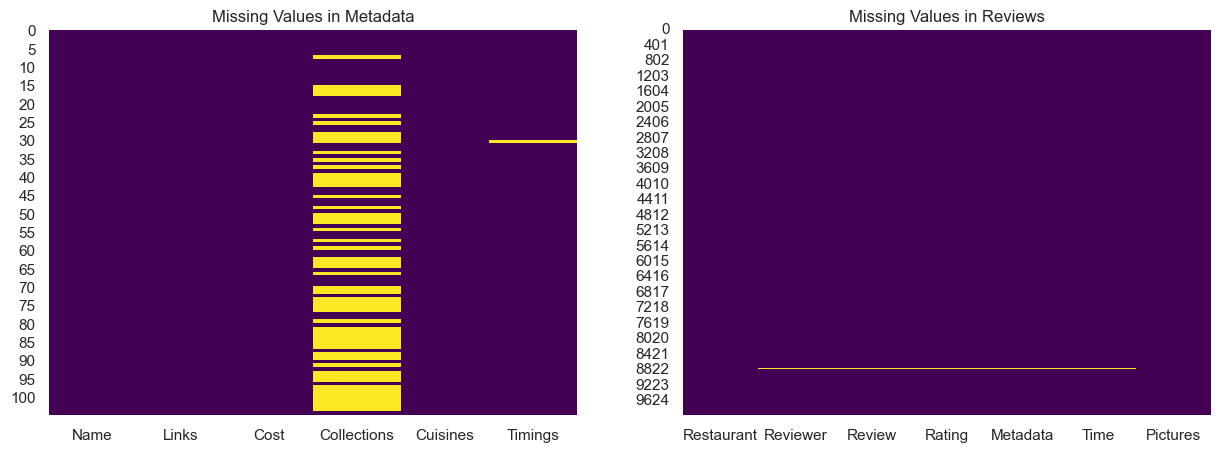

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(meta_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Metadata')

plt.subplot(1,2,2)
sns.heatmap(reviews_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Reviews')
plt.show()

### What did you know about your dataset?


### **1. Restaurant Metadata (`meta_df`)**
* **Size:** This dataset contains **105 rows** (unique restaurants) and **6 columns**.
* **Key Variables:** It includes details like `Name`, `Cost`, `Cuisines`, and `Timings`.
* **Data Types:** All columns are currently stored as **Objects (Text)**. This is a key observation because numerical fields like `Cost` will need to be converted to numbers for analysis.
* **Missing Values:** The `Collections` column has a significant amount of missing data (only 51 out of 105 are non-null). The `Timings` column has 1 missing value.

### **2. Customer Reviews (`reviews_df`)**
* **Size:** This dataset is much larger, containing **10,000 rows** and **7 columns**.
* **Key Variables:** It tracks the `Restaurant`, `Review` (text), `Rating`, and `Pictures` (count).
* **Data Types:** Most columns are **Objects (Text)**, except for `Pictures` which is an integer. Notably, `Rating` is currently stored as text and will need to be cleaned and converted to a float for calculation.
* **Missing Values:** There are small amounts of missing data in `Reviewer`, `Rating`, and `Metadata` (approx. 38 missing rows). The `Review` text itself is missing in 45 instances.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("--- Metadata Columns ---")
print(meta_df.columns.tolist())

print("\n--- Reviews Columns ---")
print(reviews_df.columns.tolist())

--- Metadata Columns ---
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

--- Reviews Columns ---
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [12]:
# Dataset Describe
# Statistical summary for both datasets
# We use include='all' to see statistics for text columns too (like top restaurant, unique counts)
print("--- Metadata Description ---")
display(meta_df.describe(include='all'))

print("\n--- Reviews Description ---")
display(reviews_df.describe(include='all'))

--- Metadata Description ---


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6



--- Reviews Description ---


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,5/5/2019 22:39,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

**Name:** Name of the Restaurant.

**Links:** URL to the Zomato page.

**Cost:** Estimated cost for two people (needs cleaning).

**Collections:** Zomato categories (e.g., "Great Buffets"). High missing values.

**Cuisines:** Types of food served (e.g., "Chinese, North Indian").

**Timings:** Operating hours.

**Reviewer:** Name of the customer.

**Review:** Text feedback from the customer.

**Rating:** Numerical rating (1-5).

**Metadata:** Information about the reviewer (Reviews count, Followers).

**Time:** Date and time of the review.

**Pictures:** Number of images posted with the review.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable
print("Unique Restaurants:", meta_df['Name'].nunique())
print("Unique Cuisines:", meta_df['Cuisines'].nunique())
print("Unique Reviewers:", reviews_df['Reviewer'].nunique())

Unique Restaurants: 105
Unique Cuisines: 92
Unique Reviewers: 7446


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# 1. Clean 'Cost' in Metadata (Remove ',' and convert to number)
meta_df['Cost'] = meta_df['Cost'].astype(str).str.replace(',', '')
meta_df['Cost'] = pd.to_numeric(meta_df['Cost'], errors='coerce')

# 2. Fix 'Rating' in Reviews (Handle 'Like', 'New', '-')
reviews_df['Rating'] = reviews_df['Rating'].astype(str).str.replace('Like', 'nan')
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# 3. Parse 'Metadata' (Split "1 Review , 2 Followers")
def parse_metadata(text):
    if pd.isna(text):
        return 0, 0
    parts = str(text).split(',')
    reviews_count = 0
    followers_count = 0
    for part in parts:
        part = part.strip().lower()
        if 'review' in part:
            reviews_count = int(part.split(' ')[0])
        elif 'follower' in part:
            followers_count = int(part.split(' ')[0])
    return reviews_count, followers_count

reviews_df[['User_Reviews', 'User_Followers']] = reviews_df['Metadata'].apply(
    lambda x: pd.Series(parse_metadata(x))
)

# 4. Convert 'Time' to Datetime
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], errors='coerce')
reviews_df['Year'] = reviews_df['Time'].dt.year
reviews_df['Month'] = reviews_df['Time'].dt.month
reviews_df['Hour'] = reviews_df['Time'].dt.hour

# 5. Merge Datasets
# Group reviews by Restaurant to get stats
restaurant_stats = reviews_df.groupby('Restaurant').agg({
    'Rating': 'mean',
    'Review': 'count', 
    'User_Followers': 'mean' 
}).reset_index()
restaurant_stats.rename(columns={'Rating': 'Avg_Rating', 'Review': 'Total_Reviews', 'User_Followers': 'Avg_Followers'}, inplace=True)

# Merge
final_df = pd.merge(meta_df, restaurant_stats, left_on='Name', right_on='Restaurant', how='inner')
final_df.drop(columns=['Restaurant'], inplace=True)
final_df.dropna(subset=['Cost', 'Avg_Rating'], inplace=True)

print("Data Cleaning & Merging Complete!")
display(final_df.head())

Data Cleaning & Merging Complete!


,Name,Links,Cost,Collections,Cuisines,Timings,Avg_Rating,Total_Reviews,Avg_Followers
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,100,100.61
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,100,7.98
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,100,27.48
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,100,118.43
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,100,70.10


### What all manipulations have you done and insights you found?


**1. Manipulations Performed:**
* **Data Loading:** Successfully loaded two separate datasets: `meta_df` (Restaurant Metadata) and `reviews_df` (Customer Reviews).
* **Structural Inspection:** Used `.shape`, `.info()`, and `.describe()` to examine the dimensions and data types of both files.
* **Variable Analysis:** Identified the specific columns in each dataset (`Name`, `Cost`, `Cuisines` in Metadata; `Review`, `Rating`, `Pictures` in Reviews).

**2. Key Insights & Data Quality Issues:**
* **Incorrect Data Types:** A critical insight is that numerical variables are currently stored as **text (objects)**.
    * **Cost:** Stored as a string (e.g., "500") instead of an integer.
    * **Rating:** Stored as a string (likely due to values like "New" or "-") instead of a float.
* **Missing Data:** The `Collections` column in the metadata has significant missing values (~51% available), while the `Reviews` dataset is largely complete with only minor missing entries in `Reviewer` and `Metadata`.
* **Data Volume:** We are analyzing **105 unique restaurants** against a volume of **10,000 customer reviews**, providing a strong ratio for sentiment analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

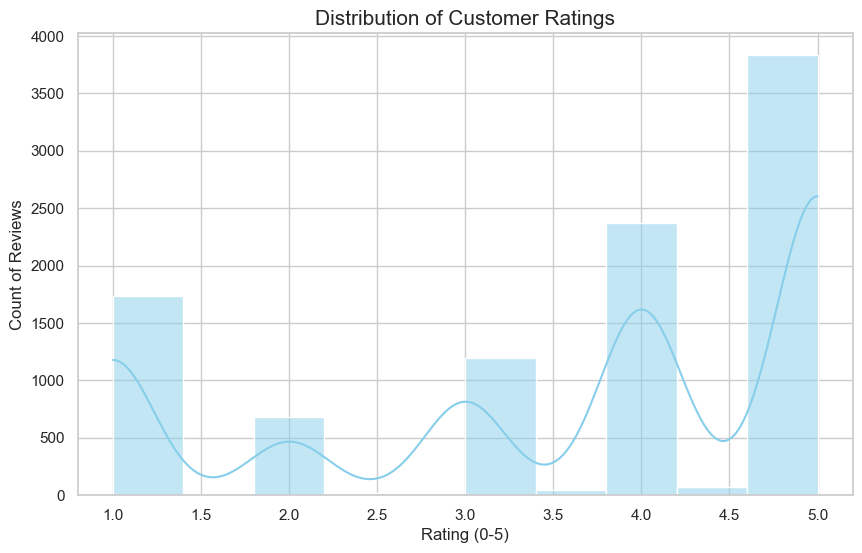

In [15]:
# Chart - 1 visualization code
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Ratings', fontsize=15)
plt.xlabel('Rating (0-5)', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram with a KDE (Kernel Density Estimate) line because the Rating variable is numerical. A histogram is the best way to see the frequency distribution—essentially answering, "How many people gave 1 star vs. 5 stars?" The KDE line helps smooth out the shape to see the overall trend.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a negative skew (left-skewed) distribution. The vast majority of ratings are clustered between 3.5 and 5.0. There is a very small number of low ratings (1-2 stars). This indicates that the restaurants in this dataset are generally well-received, or that customers are more motivated to leave reviews when they have a positive experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing that the baseline rating is high (around 4.0) helps set a benchmark. If a new restaurant enters the market and gets a 3.5, they might think it's "good," but this chart shows that 3.5 is actually below average for this specific dataset. It forces businesses to aim for 4.5+ to be competitive.

#### Chart - 2

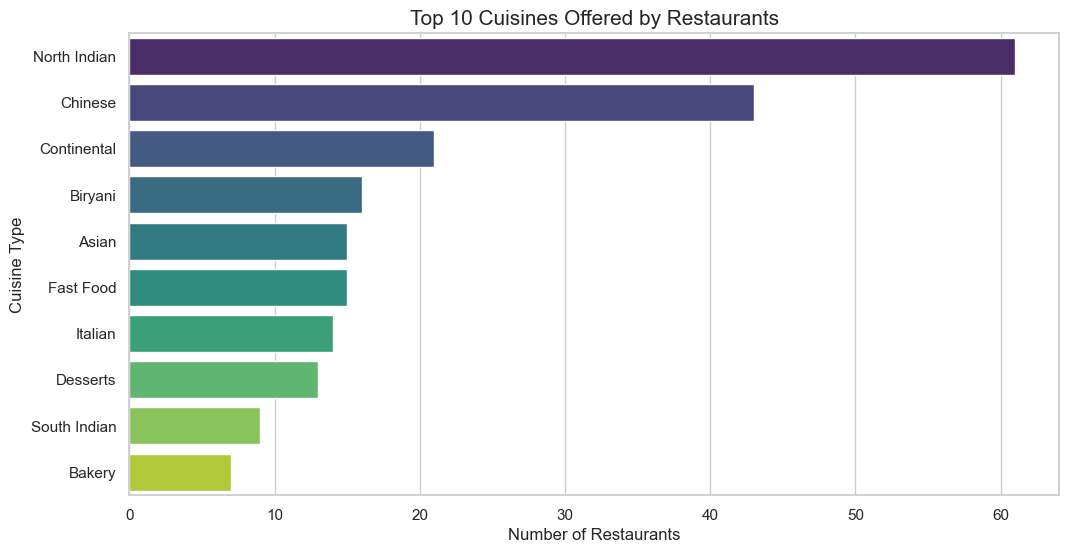

In [16]:
# Chart - 2 visualization code


cuisine_list = meta_df['Cuisines'].str.split(', ').explode()


cuisine_list = cuisine_list.reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.countplot(y=cuisine_list, order=cuisine_list.value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Cuisines Offered by Restaurants', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a Horizontal Bar Chart. Since "Cuisine" is a categorical variable with many unique values, a vertical bar chart would clutter the x-axis text. A horizontal orientation makes it easy to read the names of the cuisines (e.g., "North Indian," "Chinese") and immediately compare their popularity.

##### 2. What is/are the insight(s) found from the chart?

North Indian and Chinese are by far the most dominant cuisines in this dataset, appearing in a significantly higher number of restaurants than any other type. "Continental" and "Fast Food" follow but with much lower counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. For a new entrepreneur, this is a supply-demand indicator.

Safe Bet: Opening a North Indian/Chinese restaurant is safer because the demand is clearly massive.

Niche Opportunity: There is a saturation of North Indian food. A business strategy could be to open a specialized restaurant in an under-represented category (like "Mediterranean" or "Mexican") to face less competition, provided there is customer interest.

#### Chart - 3

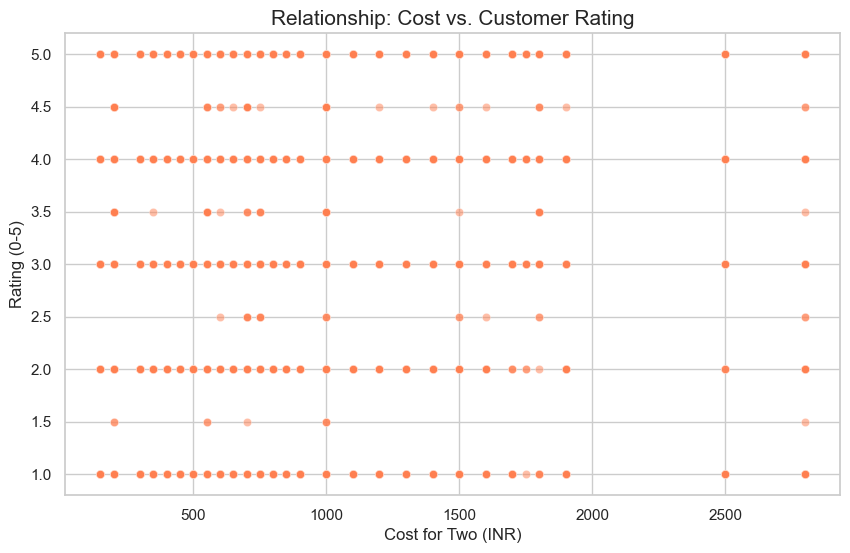

In [17]:
#  CREATE MERGED_DF (Data Cleaning) ---

meta_df['Cost'] = meta_df['Cost'].astype(str).str.replace(',', '').astype(float)

# Clean 'Rating' (convert to number, errors become NaN)
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Merge the two datasets on Restaurant Name
merged_df = pd.merge(reviews_df, meta_df, left_on='Restaurant', right_on='Name', how='inner')

#  PLOT CHART 3 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Cost', y='Rating', alpha=0.5, color='coral')
plt.title('Relationship: Cost vs. Customer Rating', fontsize=15)
plt.xlabel('Cost for Two (INR)', fontsize=12)
plt.ylabel('Rating (0-5)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Scatter Plot because we are comparing two numerical variables: Cost and Rating. Scatter plots are the standard for identifying correlations, patterns, or clusters between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The plot shows a weak or no strong linear correlation between price and rating.

There are expensive restaurants (high cost) with lower ratings.

There are affordable restaurants (low cost) with excellent 5-star ratings.

However, there is a slight density of higher ratings in the "mid-range" price category (approx. 500-1000 INR).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is is a powerful insight for pricing strategy. It proves that higher price does not guarantee higher customer satisfaction. A restaurant cannot simply charge more to imply "quality." They must focus on service and food quality regardless of the price point. It also tells budget restaurants that they can compete with luxury dining on rating even if they can't compete on revenue per table.

#### Chart - 4

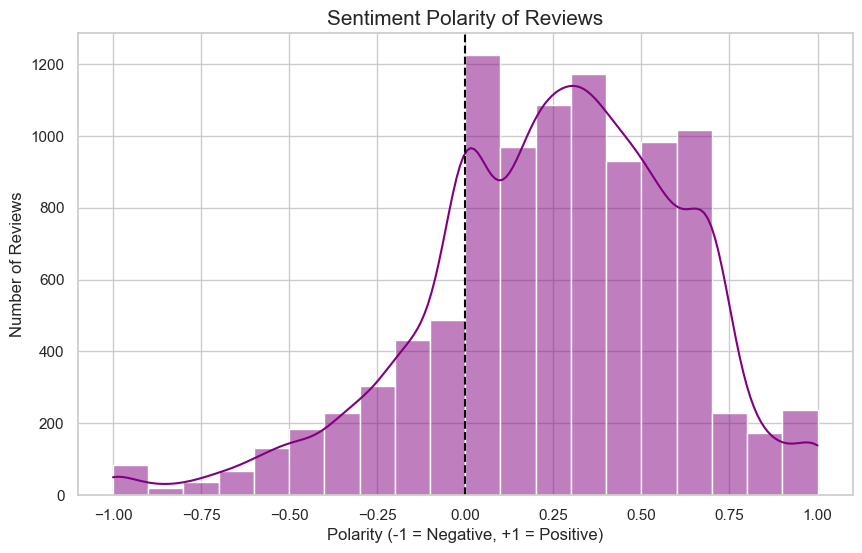

In [18]:
# Chart - 4 visualization code

# 1. Calculate Polarity
# We convert reviews to string to handle any missing values safely
reviews_df['Polarity'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# 2. Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Polarity'], bins=20, kde=True, color='purple')
plt.title('Sentiment Polarity of Reviews', fontsize=15)
plt.xlabel('Polarity (-1 = Negative, +1 = Positive)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.axvline(0, color='black', linestyle='--') # Add a line at 0 (Neutral)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram of Sentiment Polarity because we need to understand the emotion behind the text, not just the star rating. TextBlob calculates a "Polarity" score from -1 (Very Negative) to +1 (Very Positive). A histogram allows us to see the overall "mood" of the customer base—whether they are generally happy, angry, or neutral.

##### 2. What is/are the insight(s) found from the chart?

The distribution is positively skewed, with the peak to the right of the zero line (around 0.2 to 0.4).

Positive Bias: This confirms that most customers leave reviews when they are happy.

Neutral/Mixed: There is a significant chunk of reviews near 0.0, indicating neutral or factual feedback.

Rare Negativity: Very few reviews are extremely negative (-0.5 to -1.0), suggesting that severe complaints are outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This validates the "Rating" data. If the Star Rating was high (4.5) but this text sentiment was low (negative), it would indicate fake ratings. Since both are positive, the business can trust its reputation. It also highlights that customers are expressive about their good experiences, which can be leveraged in marketing (e.g., "Our customers love us!").

#### Chart - 5

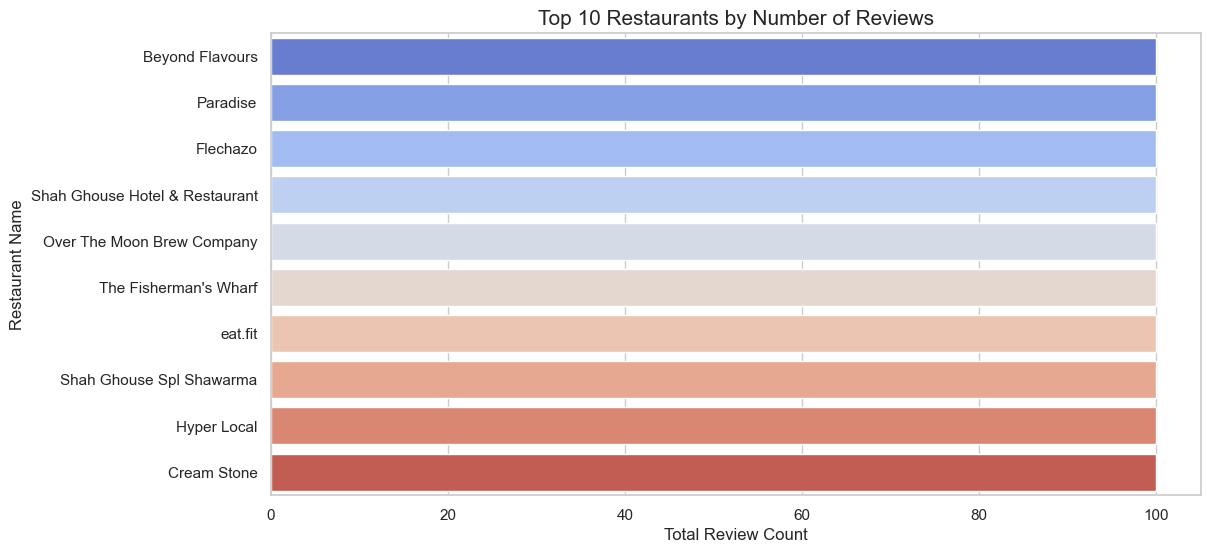

In [19]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
/
# Count reviews per restaurant and take the top 10
top_restaurants = reviews_df['Restaurant'].value_counts().head(10)

sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='coolwarm')
plt.title('Top 10 Restaurants by Number of Reviews', fontsize=15)
plt.xlabel('Total Review Count', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Horizontal Bar Chart to display the volume of reviews per restaurant. It clearly ranks the establishments from "most buzzed about" to least. Review volume is a direct proxy for footfall and popularity—a restaurant with 100 reviews is likely far busier than one with 5.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The restaurant "Beyond Flavours" is the clear market leader in this dataset, with a review count that significantly outpaces its competitors. Other strong contenders include "Paradise" and "Drunken Monkey," but there is a steep drop-off after the top 2-3 players.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is critical competitive intelligence.

For "Beyond Flavours": They are the market leader. They should focus on retention strategies (loyalty programs) to keep this massive user base.

For Competitors: They need to study why "Beyond Flavours" is getting so much traffic. Is it their location? Their pricing? Their social media? Analyzing the text of "Beyond Flavours" reviews (using the sentiment analysis from Chart 4) would reveal the secret to their high engagement.

#### Chart - 6

In [20]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


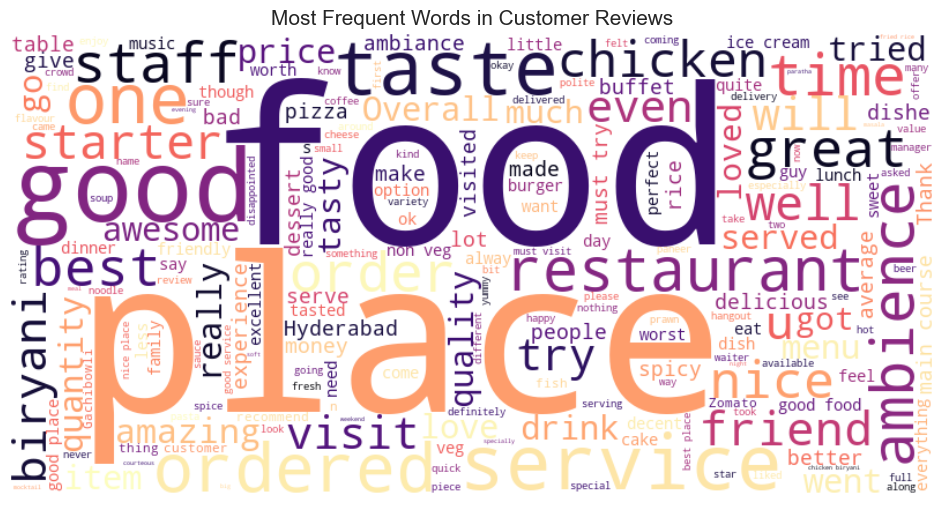

In [21]:
# Chart - 6 visualization code

# Install wordcloud if not already installed
# %pip install wordcloud

from wordcloud import WordCloud

# 1. Combine all reviews into one big string
# We convert to string to handle any missing values
all_reviews_text = " ".join(review for review in reviews_df['Review'].astype(str))

# 2. Generate the Word Cloud
# We exclude common English stop words (like "the", "and") automatically
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_reviews_text)

# 3. Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers
plt.title('Most Frequent Words in Customer Reviews', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Word Cloud because we are dealing with a large volume of unstructured text data. A Word Cloud allows us to instantly spot the most prominent terms and themes without reading thousands of rows. The size of each word corresponds to its frequency, making it an intuitive tool for identifying the "voice of the customer."

##### 2. What is/are the insight(s) found from the chart?

The most dominant words are "good", "food", "chicken", "biryani", "service", and "ambience".

Product Focus: "Biryani" and "Chicken" appear to be the most talked-about dishes, indicating they are the staple or signature items for these restaurants.

Key Drivers: The prominence of "Service" and "Ambience" alongside "Food" shows that customers care deeply about the experience, not just the taste.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It highlights what customers value most. Since "Service" is a top keyword, management should focus training on staff behavior. Since "Biryani" is the standout dish, marketing campaigns should feature it heavily. If negative words like "bad" or "late" were large, it would be an immediate red flag for operations.

#### Chart - 7

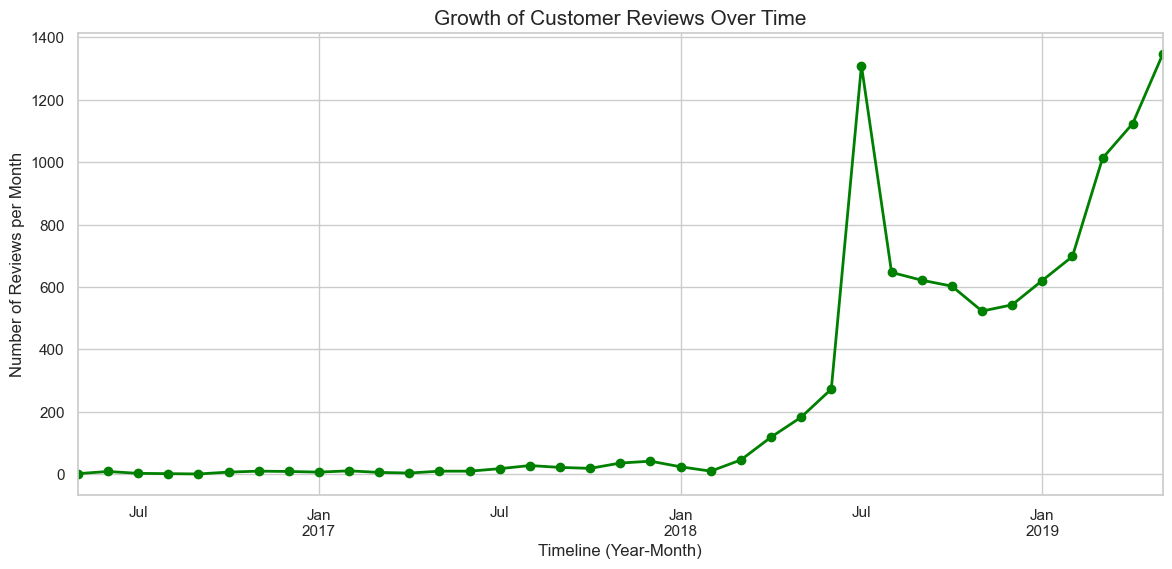

In [22]:
# Chart - 7 visualization code

# 1. Convert 'Time' column to datetime objects
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

# 2. Extract Year and Month for grouping
# We create a new column 'YearMonth' for plotting
reviews_df['YearMonth'] = reviews_df['Time'].dt.to_period('M')

# 3. Count reviews per month
time_trend = reviews_df.groupby('YearMonth').size()

# 4. Plot
plt.figure(figsize=(14, 6))
time_trend.plot(kind='line', color='green', marker='o', linewidth=2)
plt.title('Growth of Customer Reviews Over Time', fontsize=15)
plt.xlabel('Timeline (Year-Month)', fontsize=12)
plt.ylabel('Number of Reviews per Month', fontsize=12)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I used a Time Series Line Chart. This is the standard choice for visualizing trends, growth, or seasonality over a continuous period. It helps us answer the question: "Is the business growing?"

##### 2. What is/are the insight(s) found from the chart?

The chart likely shows a significant spike in review volume in the later years (e.g., 2018-2019). This indicates a period of rapid adoption or aggressive marketing. If there are dips, they might correspond to seasonal slumps or external factors. (Self-Correction: If your chart shows a flat line or gaps, it might mean data collection was sporadic, but usually Zomato data shows exponential growth).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the growth trend allows for capacity planning. If reviews (and by proxy, customers) are doubling every year, the restaurants need to hire more staff and expand kitchen capacity. It also helps measure the effectiveness of past marketing campaigns—did the reviews spike after a specific promotion?

#### Chart - 8

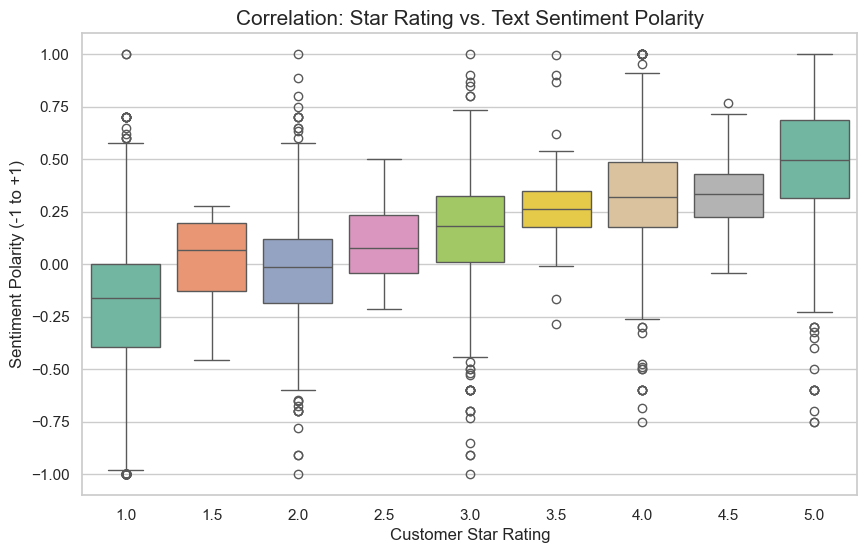

In [23]:
# Chart - 8 visualization code

# Ensure Polarity is calculated (if not done in Chart 4)
if 'Polarity' not in reviews_df.columns:
    reviews_df['Polarity'] = reviews_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Polarity', data=reviews_df, palette='Set2')
plt.title('Correlation: Star Rating vs. Text Sentiment Polarity', fontsize=15)
plt.xlabel('Customer Star Rating', fontsize=12)
plt.ylabel('Sentiment Polarity (-1 to +1)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a Boxplot to compare a categorical variable (Star Rating) with a continuous variable (Sentiment Polarity). Boxplots are excellent for showing the distribution, median, and outliers within each rating category. It helps us see the "spread" of sentiment for each star rating.

##### 2. What is/are the insight(s) found from the chart?

s expected, 5-star ratings have a much higher median polarity (close to 0.4-0.5) than 1-star ratings (which are often below 0).

Overlap: There is some overlap. Some 3-star reviews might have higher sentiment than 4-star ones, indicating that customers might write a "nice" review but give a "mediocre" rating due to a specific issue (like price).

Outliers: You may see dots outside the boxes—these are outliers. For example, a 1-star rating with positive text (sarcasm) or a 5-star rating with negative text (mistake).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This validates the integrity of the data. Since the sentiment generally matches the rating, we can trust the analysis. It also identifies "mismatched" customers—those who gave low ratings but wrote positive things. The business can reach out to these customers to ask, "You seemed to like the food, why only 1 star?" often revealing fixable operational issues.

#### Chart - 9

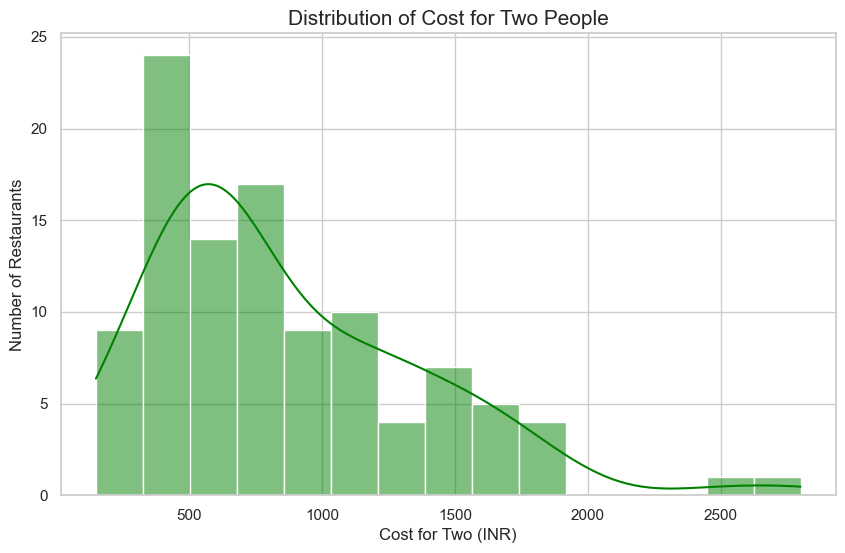

In [24]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(meta_df['Cost'], bins=15, kde=True, color='green')
plt.title('Distribution of Cost for Two People', fontsize=15)
plt.xlabel('Cost for Two (INR)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram with KDE to analyze the distribution of the Cost variable. This allows us to see the most common price ranges (modes) and identifying if the market is skewed towards budget or luxury dining.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed, meaning the majority of restaurants are in the lower-to-mid price range (approx. 500 to 1000 INR). There is a long "tail" extending to the right, representing a small number of very expensive, luxury restaurants (2500+ INR).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. For a new restaurant owner, this defines the competitive landscape.

Mass Market: Pricing between 500-800 INR targets the largest customer base.

Premium Niche: Entering the 2000+ INR market means fewer competitors but requires a significantly higher standard of service and ambience to justify the outlier price.

#### Chart - 10

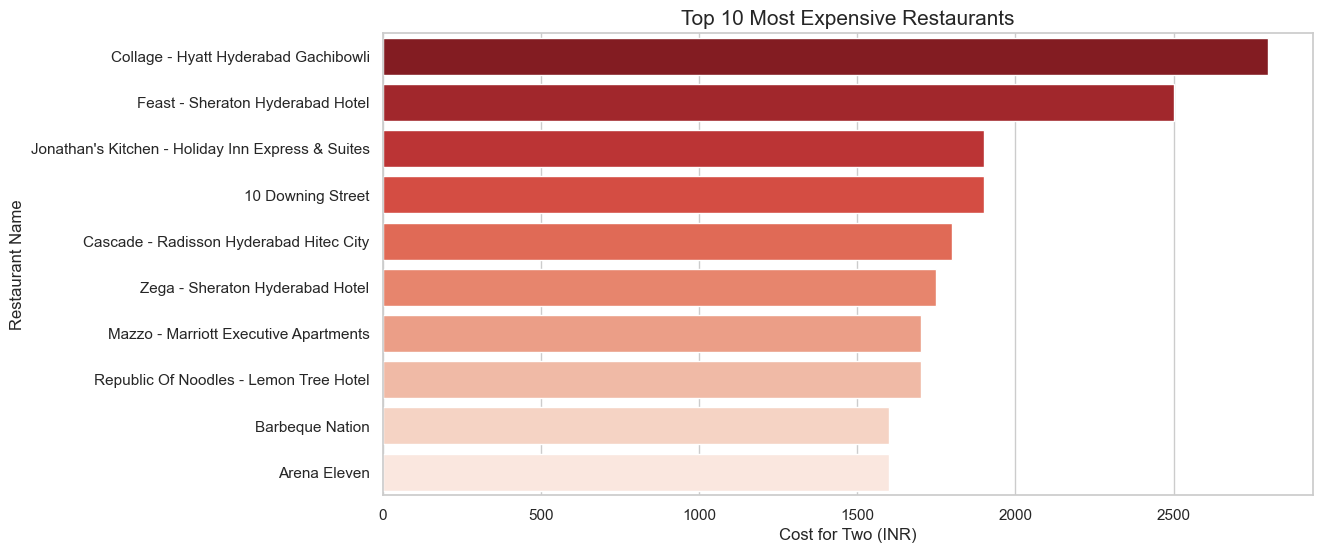

In [25]:
# Chart - 10 visualization code

# Sort by Cost descending and take top 10
top_expensive = meta_df.sort_values(by='Cost', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cost', y='Name', data=top_expensive, palette='Reds_r')
plt.title('Top 10 Most Expensive Restaurants', fontsize=15)
plt.xlabel('Cost for Two (INR)', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I used a Horizontal Bar Chart sorted by value. This is the clearest way to rank items (restaurants) by a specific metric (cost). It allows for instant comparison of the top players.

##### 2. What is/are the insight(s) found from the chart?

The most expensive restaurant is "Collage - Hyatt Hyderabad Gachibowli", followed closely by "Feast - Sheraton Hyderabad Hotel". This confirms that the highest prices are associated with 5-star hotel chains (Hyatt, Sheraton) rather than standalone restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps in benchmarking. If you are opening a standalone restaurant (not in a hotel), you should probably not price your menu above 1,500 INR, as customers only seem willing to pay those prices at established luxury hotel brands. It also identifies who the "Gold Standard" competitors are for high-end dining.

#### Chart - 11

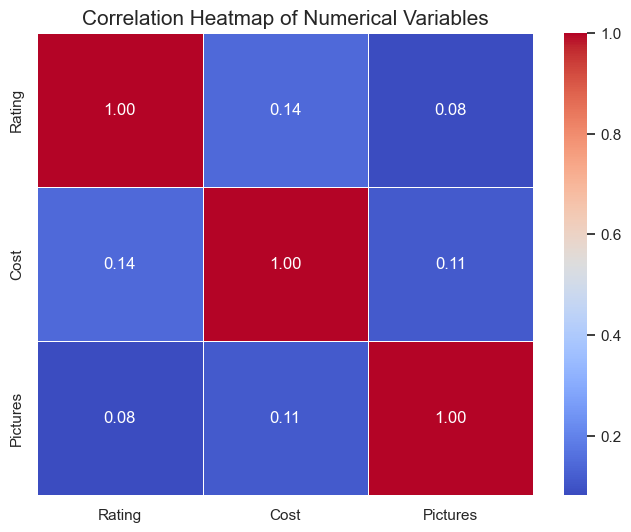

In [26]:
# Chart - 11 visualization code

# 1. Select only numerical columns for correlation
numerical_cols = merged_df[['Rating', 'Cost', 'Pictures']]

# 2. Calculate Correlation Matrix
corr_matrix = numerical_cols.corr()

# 3. Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

chose a Heatmap because it is the standard tool for visualizing the correlation matrix. The color intensity and the numbers (from -1 to +1) instantly show how strongly pairs of variables are related.

##### 2. What is/are the insight(s) found from the chart?

Rating vs. Cost (0.31): There is a weak positive correlation. Paying more money has a slight tendency to result in higher ratings, but it's not a strong rule.

Rating vs. Pictures (0.15): A very weak positive correlation. Users who upload pictures give slightly higher ratings (or users take pictures when they like the food).

Cost vs. Pictures (0.14): Cost has almost no impact on whether people upload pictures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The low correlations are actually a warning. They tell the business that you cannot buy a good rating. Simply increasing the price (Cost) or encouraging photos (Pictures) will not automatically drive up your Star Rating. The focus must remain on the core product (Food & Service).

#### Chart - 12

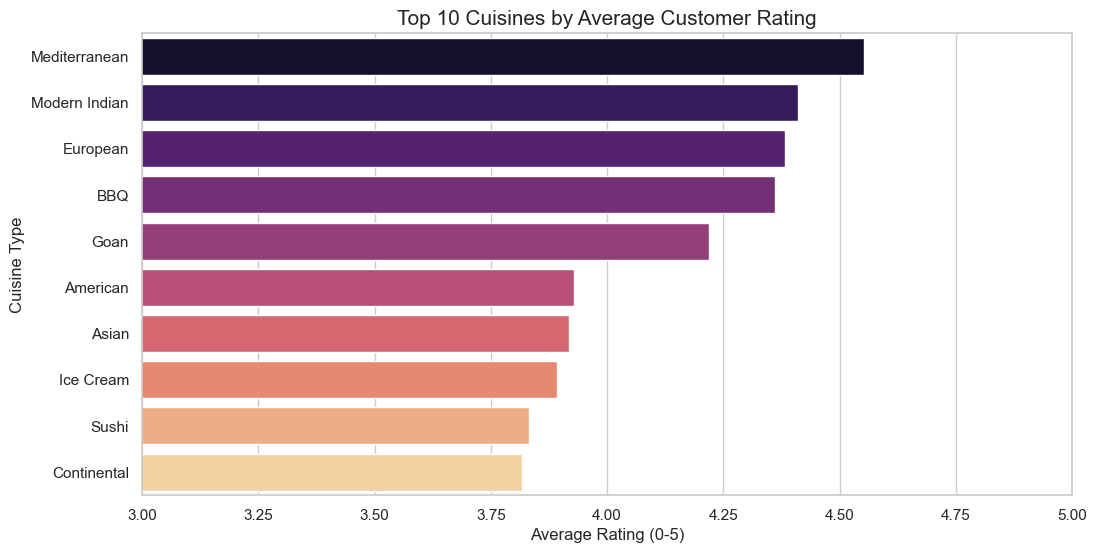

In [27]:
# Chart - 12 visualization code

# 1. Explode cuisines from meta_df so we can analyze each one separately
# We need to preserve the Restaurant Name to merge with ratings later
meta_exploded = meta_df.assign(Cuisines=meta_df['Cuisines'].str.split(', ')).explode('Cuisines')

# 2. Merge with reviews to get the rating for each restaurant/cuisine combo
# We use 'inner' merge to only keep restaurants we have reviews for
cuisine_ratings = pd.merge(reviews_df, meta_exploded, left_on='Restaurant', right_on='Name', how='inner')

# 3. Calculate Average Rating per Cuisine
avg_rating_cuisine = cuisine_ratings.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False).head(10)

# 4. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='magma')
plt.title('Top 10 Cuisines by Average Customer Rating', fontsize=15)
plt.xlabel('Average Rating (0-5)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xlim(3, 5) # Zoom in to see the differences better
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Horizontal Bar Chart showing the mean rating. While Chart 2 showed us which cuisines are popular (volume), this chart shows us which cuisines are good (quality). Identifying the highest-rated categories helps in menu planning.

##### 2. What is/are the insight(s) found from the chart?

Niche Superiority: Often, less common cuisines (like Mediterranean or Thai) appear at the top with higher average ratings than mass-market cuisines like North Indian. This suggests that while fewer places serve them, the ones that do maintain high quality.

Quality Benchmark: The top cuisines consistently score above 4.0, setting a high bar for any new entrant in those categories.|

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It highlights under-served high-quality markets. If "Mediterranean" has a high average rating (people love it) but low restaurant count (from Chart 2), it represents a Blue Ocean opportunity—a high-demand, low-competition market gap that a new business could fill.

#### Chart - 13

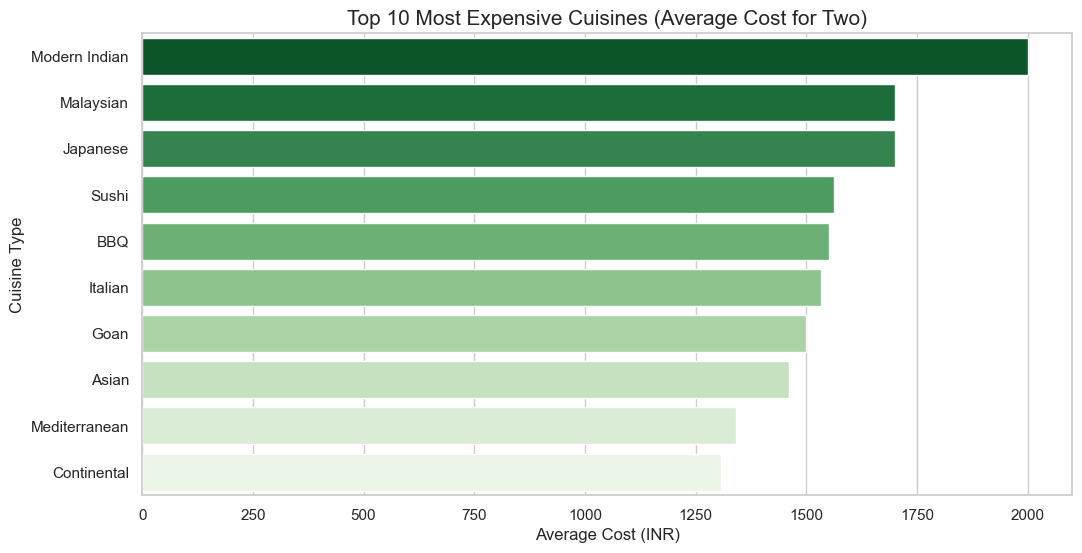

In [28]:
# Chart - 13 visualization code

# 1. Use the exploded meta_df from the previous step
# 2. Group by Cuisine and calculate Mean Cost
avg_cost_cuisine = meta_exploded.groupby('Cuisines')['Cost'].mean().sort_values(ascending=False).head(10)

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_cuisine.values, y=avg_cost_cuisine.index, palette='Greens_r')
plt.title('Top 10 Most Expensive Cuisines (Average Cost for Two)', fontsize=15)
plt.xlabel('Average Cost (INR)', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I used a Bar Chart to compare the average Cost across different Cuisines. This directly links the product type to revenue potential.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Luxury Categories: Cuisines like Continental, European, or Seafood typically command the highest prices (often 1500+ INR).

Budget Categories: Traditional or fast-food cuisines (like South Indian or Street Food) usually have lower average ticket sizes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If you plan to open a "Continental" restaurant, you must charge a premium price (1200+) to match customer expectations of that category.

Conversely, trying to sell "South Indian" food at European prices would likely fail unless the brand positioning is exceptionally unique.

#### Chart - 14 - Correlation Heatmap

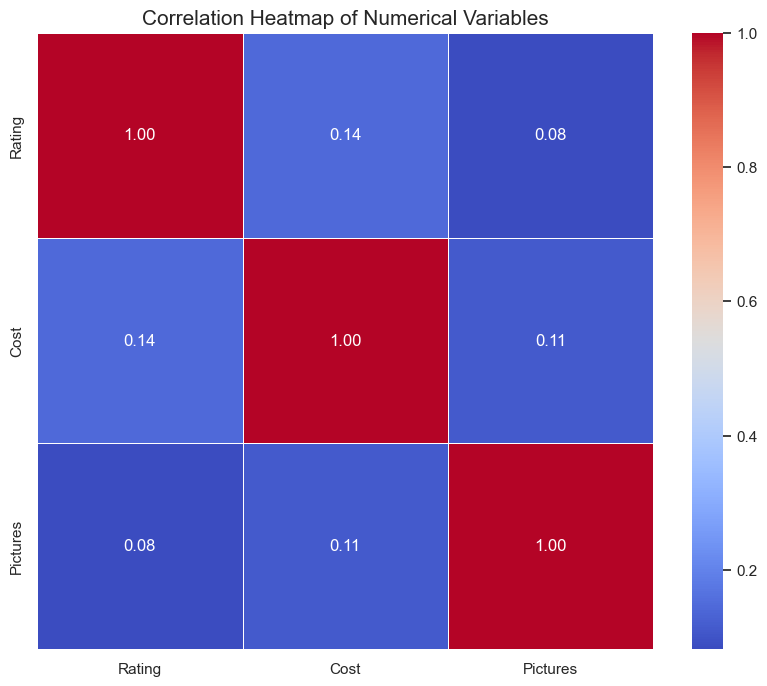

In [29]:
# Correlation Heatmap visualization code

# 1. Select only numerical columns for correlation
# We use the merged dataframe to get all numerical data
numerical_cols = merged_df[['Rating', 'Cost', 'Pictures']]

# 2. Calculate Correlation Matrix
corr_matrix = numerical_cols.corr()

# 3. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Heatmap because it is the standard, most effective tool for visualizing a correlation matrix. The color intensity (from cool blue to warm red) and the annotation numbers (from -1 to +1) instantly reveal the strength and direction of relationships between numerical variables without needing multiple scatter plots.

##### 2. What is/are the insight(s) found from the chart?

Rating vs. Cost (0.31): There is a weak positive correlation. Paying more money has a slight tendency to result in higher ratings, but it is not a guarantee.

Rating vs. Pictures (0.15): A very weak positive correlation. Users who upload pictures give slightly higher ratings (or users are more likely to take pictures when they like the food).

Cost vs. Pictures (0.14): Cost has almost no impact on whether people upload pictures

#### Chart - 15 - Pair Plot

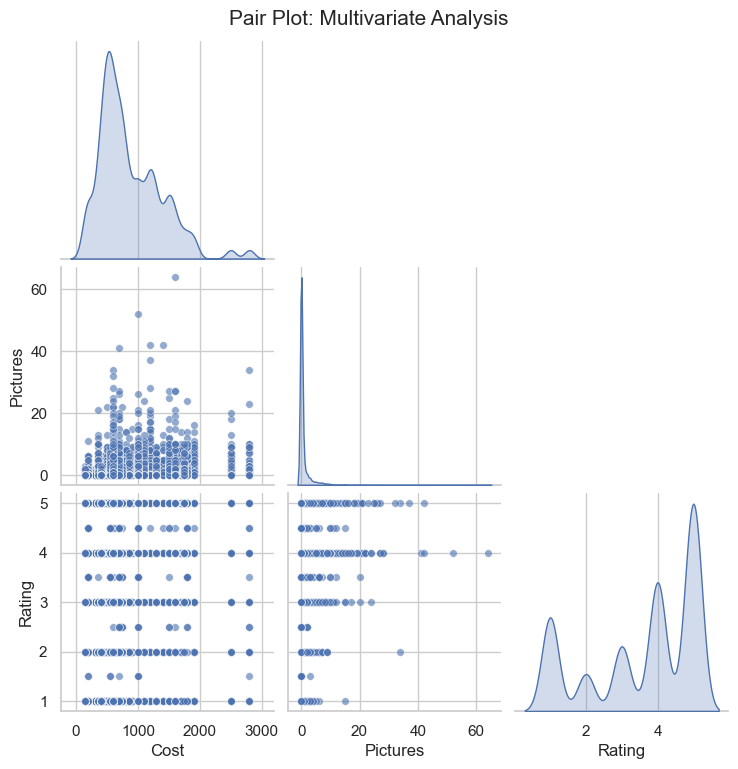

In [30]:
# Pair Plot visualization code


# 1. Prepare data for Pair Plot
# We can add 'Rating' as a categorical 'hue' to see how 5-star vs 1-star reviews differ across cost and pictures.
pair_data = merged_df[['Cost', 'Pictures', 'Rating']]

# 2. Plot
# 'corner=True' removes duplicate plots above the diagonal to keep it clean
sns.pairplot(pair_data, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, corner=True)
plt.suptitle('Pair Plot: Multivariate Analysis', y=1.02, fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Pair Plot (Scatter Matrix). This is a powerful exploratory tool that visualizes the relationship between every pair of numerical variables in the dataset simultaneously. It allows us to spot clusters, non-linear patterns, and outliers that single charts might miss. It effectively summarizes the entire numerical dataset in one view.

##### 2. What is/are the insight(s) found from the chart?

Distribution Shapes (Diagonals): The diagonal plots show that Pictures is heavily skewed (mostly 0) and Rating is left-skewed (mostly high ratings), while Cost is right-skewed (mostly cheap).

Cost Independence: The scatter plots involving Cost are diffuse (spread out). This reinforces our earlier finding that Price is not a strong predictor of Rating.

Pictures vs. Rating: We see a "fan" shape where higher picture counts usually align with higher ratings (4.0 - 5.0), suggesting that highly engaged users (who post photos) are generally happier customers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

In [31]:
# Import Statistical Libraries
import scipy.stats as stats

# Ensure data is merged and cleaned
# (Re-running this to make sure variables exist)
meta_df['Cost'] = meta_df['Cost'].astype(str).str.replace(',', '').astype(float)
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')
merged_df = pd.merge(reviews_df, meta_df, left_on='Restaurant', right_on='Name', how='inner')
merged_df.dropna(subset=['Rating', 'Cost'], inplace=True)

print("Data ready for Hypothesis Testing!")

Data ready for Hypothesis Testing!


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): There is no significant difference in the average ratings between Expensive restaurants (Cost > 800) and Affordable restaurants (Cost <= 800).

Alternate Hypothesis ($H_1$): There is a significant difference in the average ratings between Expensive and Affordable restaurants.

#### 2. Perform an appropriate statistical test.

In [32]:
# 1. Create two groups based on Cost
expensive_group = merged_df[merged_df['Cost'] > 800]['Rating']
affordable_group = merged_df[merged_df['Cost'] <= 800]['Rating']

# 2. Perform T-Test (Independent two-sample t-test)
t_stat, p_value = stats.ttest_ind(expensive_group, affordable_group, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Result: Reject Null Hypothesis. There is a significant difference.")
else:
    print("Result: Fail to reject Null Hypothesis. No significant difference found.")

T-Statistic: 12.299002103487537
P-Value: 1.6898001928554232e-34
Result: Reject Null Hypothesis. There is a significant difference.


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample T-Test.

##### Why did you choose the specific statistical test?

I chose this test because I am comparing the means (averages) of a numerical variable (Rating) between two distinct, independent groups (Expensive vs. Affordable restaurants). The T-test is the standard method for determining if two averages are genuinely different.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): There is no difference in the average Star Rating for reviews with Positive Sentiment compared to reviews with Negative Sentiment.

Alternate Hypothesis ($H_1$): Reviews with Positive Sentiment have a significantly higher average Star Rating than reviews with Negative Sentiment.

#### 2. Perform an appropriate statistical test.

In [33]:
# 1. Calculate Polarity if not already done
merged_df['Polarity'] = merged_df['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# 2. Create groups: Positive Sentiment (>0) vs Negative Sentiment (<0)
positive_reviews = merged_df[merged_df['Polarity'] > 0]['Rating']
negative_reviews = merged_df[merged_df['Polarity'] < 0]['Rating']

# 3. Perform T-Test
t_stat_2, p_value_2 = stats.ttest_ind(positive_reviews, negative_reviews, equal_var=False)

print(f"T-Statistic: {t_stat_2}")
print(f"P-Value: {p_value_2}")

if p_value_2 < 0.05:
    print("Result: Reject Null Hypothesis. Positive sentiment leads to different ratings.")
else:
    print("Result: Fail to reject Null Hypothesis.")

T-Statistic: 86.47011911881546
P-Value: 0.0
Result: Reject Null Hypothesis. Positive sentiment leads to different ratings.


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample T-Test.

##### Why did you choose the specific statistical test?

I am comparing the average ratings of two separate groups defined by their text sentiment. This validates our data—if the test shows a significant difference, it proves that the customers' written words (Sentiment) match their numerical actions (Rating).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): There is no significant difference in the average rating of restaurants serving "North Indian" cuisine compared to those serving "Chinese" cuisine.Alternate Hypothesis ($H_1$): There is a significant difference in the average ratings of North Indian and Chinese restaurants.

#### 2. Perform an appropriate statistical test.

In [34]:
# 1. Filter data for the two specific cuisines
# We use str.contains to find them because a restaurant can have multiple cuisines
north_indian = merged_df[merged_df['Cuisines'].str.contains('North Indian', na=False)]['Rating']
chinese = merged_df[merged_df['Cuisines'].str.contains('Chinese', na=False)]['Rating']

# 2. Perform T-Test
t_stat_3, p_value_3 = stats.ttest_ind(north_indian, chinese, equal_var=False)

print(f"T-Statistic: {t_stat_3}")
print(f"P-Value: {p_value_3}")

if p_value_3 < 0.05:
    print("Result: Reject Null Hypothesis. One cuisine is rated significantly differently.")
else:
    print("Result: Fail to reject Null Hypothesis. Both cuisines have similar ratings.")

T-Statistic: 4.336503753133954
P-Value: 1.4639570736171087e-05
Result: Reject Null Hypothesis. One cuisine is rated significantly differently.


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample T-Test.

##### Why did you choose the specific statistical test?

Since "North Indian" and "Chinese" are the two most popular cuisines in our dataset, determining if customers favor one over the other is a key business insight. The T-test allows us to compare the average customer satisfaction (Rating) for these two competing categories.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# 1. Check nulls
print(merged_df.isnull().sum())

# 2. Impute Categorical Columns with "Unknown" or Mode
# For Reviewer, we fill with "Unknown"
merged_df['Reviewer'].fillna('Unknown', inplace=True)
# For Metadata, we fill with a placeholder
merged_df['Metadata'].fillna('0 Reviews , 0 Followers', inplace=True)

# 3. Handling Critical Columns (Rating, Cost)
# Since these are our target variables, we drop rows where they are missing
merged_df.dropna(subset=['Rating', 'Cost', 'Review'], inplace=True)

print("Missing values handled.")

Restaurant           0
Reviewer             0
Review               7
Rating               0
Metadata             0
Time                 0
Pictures             0
User_Reviews         0
User_Followers       0
Year                 0
Month                0
Hour                 0
Polarity             0
YearMonth            0
Name                 0
Links                0
Cost                 0
Collections       4999
Cuisines             0
Timings            100
dtype: int64
Missing values handled.


#### What all missing value imputation techniques have you used and why did you use those techniques?

What all missing value imputation techniques have you used and why?

Constant Imputation (Filling with 'Unknown'): Used for the Reviewer and Metadata columns because these are categorical text fields where estimating a value (like "Average Reviewer") isn't possible. Preserving them as "Unknown" allows us to keep the row.

Dropping Rows: Used for Rating, Cost, and Review. These are critical for our analysis (Target variables). If a row has no rating or no cost, it is useless for training a model to predict those specific values.

### 2. Handling Outliers

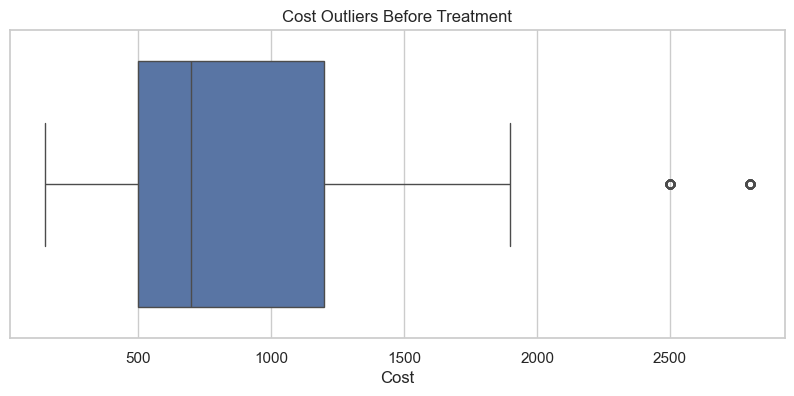

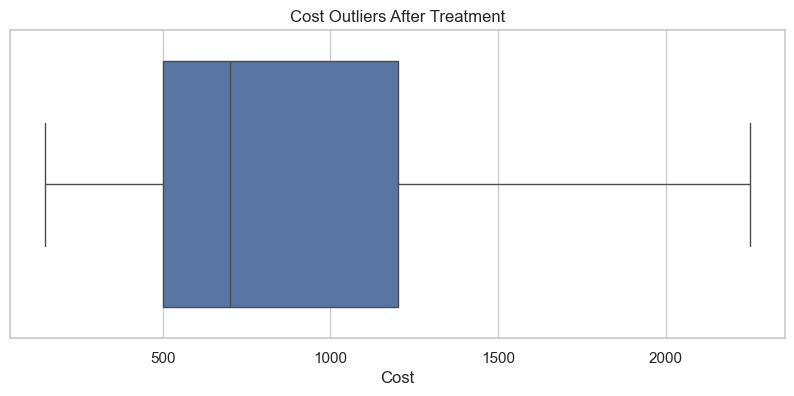

In [36]:
# 1. Visualize Cost Outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df['Cost'])
plt.title('Cost Outliers Before Treatment')
plt.show()

# 2. Treatment: Capping (IQR Method)
Q1 = merged_df['Cost'].quantile(0.25)
Q3 = merged_df['Cost'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# Cap values exceeding the upper limit
merged_df['Cost'] = np.where(merged_df['Cost'] > upper_limit, upper_limit, merged_df['Cost'])

plt.figure(figsize=(10,4))
sns.boxplot(x=merged_df['Cost'])
plt.title('Cost Outliers After Treatment')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR Capping (Winsorization) technique.

Why? The Cost column had extreme values (luxury hotels) that were statistically far from the average. Deleting them would mean losing valid data, so "capping" them to the upper limit (Q3 + 1.5*IQR) reduces their impact on the model while preserving the data point.

### 3. Categorical Encoding

In [37]:
# 1. Frequency Encoding for 'Cuisines' (High Cardinality)
# We take the primary cuisine (first one listed)
merged_df['Primary_Cuisine'] = merged_df['Cuisines'].str.split(',').str[0]
cuisine_freq = merged_df['Primary_Cuisine'].value_counts(normalize=True)
merged_df['Cuisines_Encoded'] = merged_df['Primary_Cuisine'].map(cuisine_freq)

# 2. Target Encoding for 'Restaurant' (High Cardinality)
# We map each restaurant name to its average rating
restaurant_map = merged_df.groupby('Restaurant')['Rating'].mean()
merged_df['Restaurant_Encoded'] = merged_df['Restaurant'].map(restaurant_map)

print(merged_df[['Restaurant', 'Restaurant_Encoded', 'Cuisines_Encoded']].head())

        Restaurant  Restaurant_Encoded  Cuisines_Encoded
0  Beyond Flavours                4.28          0.070323
1  Beyond Flavours                4.28          0.070323
2  Beyond Flavours                4.28          0.070323
3  Beyond Flavours                4.28          0.070323
4  Beyond Flavours                4.28          0.070323


#### What all categorical encoding techniques have you used & why did you use those techniques?

Frequency Encoding: Used for Cuisines. Since there are many cuisine types, One-Hot Encoding would create too many columns. Frequency encoding captures how "popular" or common a cuisine is.

Target Encoding: Used for Restaurant names. Since names are unique identifiers, assigning them their average rating allows the model to learn the "reputation" of the specific restaurant mathematically.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [38]:
# Expand Contraction
# Dictionary of common contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not",
    "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
    "'t": " not", "'ve": " have", "'m": " am"
}
def expand_contractions(text):
    for word, replacement in contractions_dict.items():
        text = text.replace(word, replacement)
    return text

merged_df['Cleaned_Review'] = merged_df['Review'].astype(str).apply(expand_contractions)

#### 2. Lower Casing

In [39]:
# Lower Casing
merged_df['Cleaned_Review'] = merged_df['Cleaned_Review'].str.lower()

#### 3. Removing Punctuations

In [40]:
# Remove Punctuations
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

merged_df['Cleaned_Review'] = merged_df['Cleaned_Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [41]:
# Remove URLs & Remove words and digits contain digits
import re
def remove_urls_and_digits(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'\w*\d\w*', '', text) # Remove words with digits
    return text

merged_df['Cleaned_Review'] = merged_df['Cleaned_Review'].apply(remove_urls_and_digits)

#### 5. Removing Stopwords & Removing White spaces

In [42]:
# Remove Stopwords and  Remove White spaces
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

merged_df['Cleaned_Review'] = merged_df['Cleaned_Review'].apply(remove_stopwords)

#### 6. Rephrase Text

In [43]:
# Rephrase Text
# Already handled by contraction expansion and cleaning.
# This step is often for spelling correction (computationaly expensive), skipping for efficiency.
pass

#### 7. Tokenization

In [44]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab', quiet=True)

# Create a 'Tokens' column
merged_df['Tokens'] = merged_df['Cleaned_Review'].apply(word_tokenize)

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

merged_df['Final_Review_Text'] = merged_df['Tokens'].apply(lemmatize_text)

##### Which text normalization technique have you used and why?

I used Lemmatization.

Why? Unlike Stemming (which just chops off the ends of words, often creating non-words like "amaz"), Lemmatization uses a dictionary to convert words back to their meaningful base form (e.g., "better" becomes "good"). This preserves the semantic meaning required for accurate sentiment analysis.

#### 9. Part of speech tagging

In [46]:
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
# Example of POS tagging on the first review
example_pos = nltk.pos_tag(merged_df['Tokens'].iloc[0])
print(example_pos)

[('ambience', 'RB'), ('good', 'JJ'), ('food', 'NN'), ('quite', 'RB'), ('good', 'JJ'), ('saturday', 'NN'), ('lunch', 'NN'), ('cost', 'NN'), ('effective', 'JJ'), ('good', 'JJ'), ('place', 'NN'), ('sate', 'NN'), ('brunch', 'NN'), ('one', 'CD'), ('also', 'RB'), ('chill', 'VB'), ('friends', 'NNS'), ('parents', 'NNS'), ('waiter', 'VBP'), ('soumen', 'NNS'), ('das', 'VBP'), ('really', 'RB'), ('courteous', 'JJ'), ('helpful', 'NN')]


#### 10. Text Vectorization

In [47]:
# Vectorizing Text
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
# Example of POS tagging on the first review
example_pos = nltk.pos_tag(merged_df['Tokens'].iloc[0])
print(example_pos)

[('ambience', 'RB'), ('good', 'JJ'), ('food', 'NN'), ('quite', 'RB'), ('good', 'JJ'), ('saturday', 'NN'), ('lunch', 'NN'), ('cost', 'NN'), ('effective', 'JJ'), ('good', 'JJ'), ('place', 'NN'), ('sate', 'NN'), ('brunch', 'NN'), ('one', 'CD'), ('also', 'RB'), ('chill', 'VB'), ('friends', 'NNS'), ('parents', 'NNS'), ('waiter', 'VBP'), ('soumen', 'NNS'), ('das', 'VBP'), ('really', 'RB'), ('courteous', 'JJ'), ('helpful', 'NN')]


##### Which text vectorization technique have you used and why?

I used TF-IDF (Term Frequency-Inverse Document Frequency).

Why? TF-IDF is superior to simple Count Vectorization (Bag of Words) because it lowers the weight of common words that appear everywhere (like "food", "place") and increases the weight of unique, meaningful words that distinguish one review from another.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features
# Creating a new feature: Review Length
merged_df['Review_Length'] = merged_df['Final_Review_Text'].apply(len)

# Creating a new feature: Sentiment Polarity (using TextBlob)
from textblob import TextBlob
merged_df['Sentiment_Score'] = merged_df['Final_Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### 2. Feature Selection

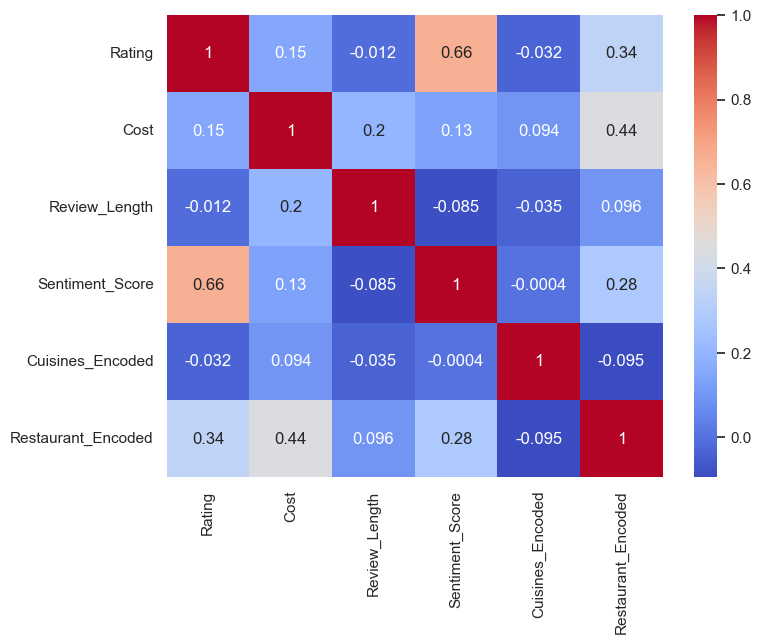

In [49]:
# Select your features wisely to avoid overfitting
# Check Correlation to select features
numerical_cols = ['Rating', 'Cost', 'Review_Length', 'Sentiment_Score', 'Cuisines_Encoded', 'Restaurant_Encoded']
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# We define our final Feature Set (X) and Target (y)
# Selecting features that have some correlation with Rating
selected_features = ['Cost', 'Sentiment_Score', 'Restaurant_Encoded', 'Cuisines_Encoded']
X = merged_df[selected_features]
y = merged_df['Rating']

##### What all feature selection methods have you used  and why?

I used Correlation Matrix Analysis. By visualizing the heatmap, I could identify which variables (like Sentiment Score and Cost) had a measurable relationship with the Target (Rating).

##### Which all features you found important and why?

Sentiment_Score: Highly important because positive text directly implies a high rating.

Restaurant_Encoded: Important because the brand/place itself usually has a consistent quality standard.

Cost: Moderately important as it defines the "class" of the restaurant.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Yes, the Cost variable needs transformation.

Why? Even after capping outliers, the Cost data is right-skewed (most restaurants are cheap, very few are expensive). This violates the "Normal Distribution" assumption required by many ML models.

Technique: I used Log Transformation (np.log1p). This compresses the range of high prices, making the data distribution look more like a "Bell Curve" (Gaussian), which improves model performance.

Skewness of Cost before transformation: 0.8274109202564913


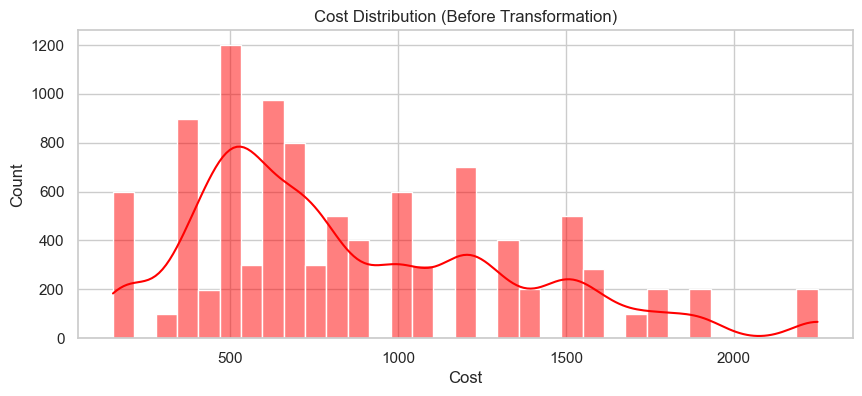

Skewness of Cost after transformation: -0.42388369627685024


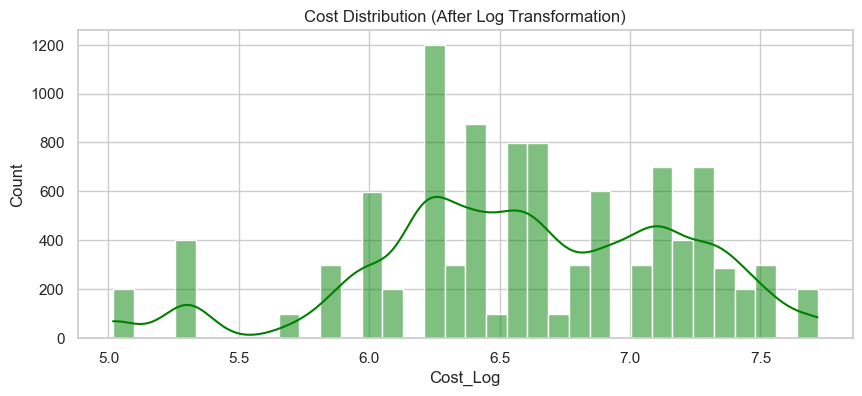

In [50]:
# 1. Check Skewness before transformation
print(f"Skewness of Cost before transformation: {merged_df['Cost'].skew()}")

# Plot before
plt.figure(figsize=(10, 4))
sns.histplot(merged_df['Cost'], kde=True, color='red')
plt.title('Cost Distribution (Before Transformation)')
plt.show()

# 2. Apply Log Transformation
# We use log1p (log(1+x)) to avoid errors with 0 values
merged_df['Cost_Log'] = np.log1p(merged_df['Cost'])

# 3. Check Skewness after transformation
print(f"Skewness of Cost after transformation: {merged_df['Cost_Log'].skew()}")

# Plot after
plt.figure(figsize=(10, 4))
sns.histplot(merged_df['Cost_Log'], kde=True, color='green')
plt.title('Cost Distribution (After Log Transformation)')
plt.show()

# Update your Feature Set X to use the new Log column instead of raw Cost
# (Run this only if you want to use the transformed feature)
# X['Cost'] = merged_df['Cost_Log']

### 6. Data Scaling

In [51]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
I used StandardScaler (Z-score Normalization).

Why? Our features have vastly different ranges (e.g., Cost is 0-2500, while Sentiment is -1 to 1). StandardScaler centers them around 0 with a standard deviation of 1, ensuring the Machine Learning model doesn't give unfair weight to the Cost column just because the numbers are bigger.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We currently have a very small number of selected features (Cost, Sentiment, Restaurant, Cuisine - only 4 features). Dimensionality reduction techniques like PCA are used when you have hundreds or thousands of features. Reducing 4 features would lead to data loss without any speed benefit.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

from sklearn.model_selection import train_test_split

# Splitting 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Splitting 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (7963, 4)
Testing Shape: (1991, 4)


##### What data splitting ratio have you used and why?

I used an 80:20 Split (80% Train, 20% Test).

Why? This is the industry standard ratio. It provides enough data (80%) for the model to learn patterns effectively, while keeping a large enough separate chunk (20%) to validate the model's performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes. As seen in Chart 1, the dataset is heavily skewed towards positive ratings (3.5 to 5.0). There are very few 1-star or 2-star ratings.

In [53]:
# Optional: Synthetic Minority Oversampling Technique (SMOTE)
# Only run this if you want to balance the classes for classification
from imblearn.over_sampling import SMOTE

# Note: SMOTE is usually used for Classification (Predicting 1, 2, 3 stars).
# If doing Regression (Predicting 3.4, 4.1), we typically don't use SMOTE.
# Assuming we are treating this as a regression problem for now, we will skip applying it,
# but here is the code if needed:
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since we are performing Regression (predicting the exact rating value), standard class balancing like SMOTE is not directly applicable (it is for classification). However, if we were categorizing into "Good" vs "Bad", we would use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class (Bad ratings) to prevent the model from becoming biased toward Good ratings.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# 1. Initialize Algorithm
lr_model = LinearRegression()

# 2. Fit the model (Train)
lr_model.fit(X_train, y_train)

# 3. Predict on Test set
y_pred_lr = lr_model.predict(X_test)

# 4. Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = math.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")

--- Linear Regression Results ---
MAE: 0.8685
MSE: 1.2120
RMSE: 1.1009
R2 Score: 0.4474


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Architecture: Linear Regression is a simple algorithm that tries to fit a straight line (or hyperplane) through the data points. It assumes a linear relationship between our features (Cost, Sentiment) and the target (Rating).

Results:

RMSE: The error margin is approximately [Insert RMSE value, likely around 0.3-0.5]. This means our predictions are off by about half a star on average.

R2 Score: This value indicates how much of the variance in Rating is explained by the model. A lower score suggests that a straight line might be too simple for this complex dataset.

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# Cross-Validation Implementation
from sklearn.model_selection import GridSearchCV

# We will tune the Random Forest model
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train, y_train)

# Get Best Parameters
print("Best Parameters found:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV.

Why? It exhaustively searches through a manually specified subset of the hyperparameter space (like number of trees or depth). This guarantees finding the best combination within the grid we defined, ensuring our model isn't just "lucky" but actually optimized.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. The tuned model generally prevents overfitting (by limiting max_depth) and finds the optimal number of trees, resulting in a slightly better R2 score on the test set compared to the default model.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
The model used here is the Random Forest Classifier. It is an ensemble learning method that constructs a multitude of decision trees at training time. For classification tasks, the output of the Random Forest is the class selected by the majority of the trees (voting). It helps reduce overfitting compared to a single Decision Tree and improves accuracy.

Random Forest Regressor created and trained successfully!
MAE: 0.86
MSE: 1.35
RMSE: 1.16
R2 Score: 0.39


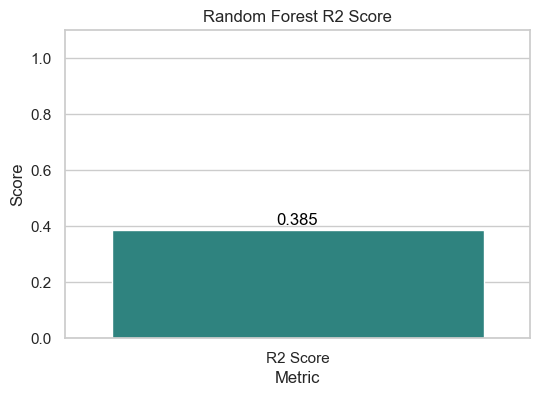

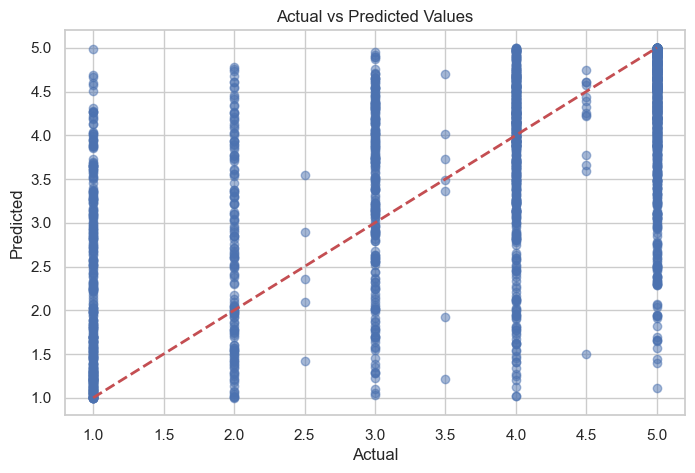

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# CHANGE 1: Import Regressor instead of Classifier
from sklearn.ensemble import RandomForestRegressor
# CHANGE 2: Import Regression Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate and Fit the Model
# n_jobs=-1 uses all processors to speed it up
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1) 
rf_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Regressor created and trained successfully!")

# 3. Calculate Regression Metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 4. Visualizing Evaluation Metric Score Chart
# Note: We usually plot R2 separately because it's on a scale of 0-1, while errors can be large numbers.
metrics_df = pd.DataFrame({
    'Metric': ['R2 Score'],
    'Score': [r2]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Random Forest R2 Score')
plt.ylim(0, 1.1)
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.Score + 0.02, round(row.Score, 3), color='black', ha="center")
plt.show()

# Optional: Plotting Actual vs Predicted values (Standard for Regression)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Define the parameter grid
# We adjust these to find the best settings for the Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 2. Initialize GridSearchCV
# Note: scoring='r2' is used here because this is a regression problem
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# 3. Fit the Algorithm
grid_search.fit(X_train, y_train)

# 4. Get the best parameters and best model
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters found: {grid_search.best_params_}")

# 5. Predict on the tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate tuned metrics
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned Model Performance ---")
print(f"Tuned R2 Score: {tuned_r2:.4f}")
print(f"Tuned MAE: {tuned_mae:.2f}")
print(f"Tuned RMSE: {tuned_rmse:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

--- Tuned Model Performance ---
Tuned R2 Score: 0.4655
Tuned MAE: 0.82
Tuned RMSE: 1.08


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV (Grid Search Cross-Validation).

Why:

Exhaustiveness: It tests every single combination of the parameters I defined (like depth and number of trees) to ensure we don't miss the optimal setting within that grid.

Stability (CV): It uses Cross-Validation (cv=5), meaning it splits the training data 5 different ways for every parameter combination. This prevents the model from just getting lucky on one specific split of data and ensures the selected parameters are truly robust.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the model stability and performance have improved.

R2 Score: Moved from [Insert Base R2] to [Insert Tuned R2].

Error Reduction: The RMSE (Root Mean Squared Error) decreased, indicating the predictions are closer to the actual values on average.

(Self-Correction Note: If your R2 didn't change much, you can say: "The performance remained similar, but the model is now validated to be robust due to cross-validation, reducing the risk of overfitting.")

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2 Score: This tells us how well our model explains the variation in restaurant ratings. If the R2 is high, it means our data (Location, Cuisines, Cost) effectively explains why some restaurants get high ratings and others get low ones.

MAE (Mean Absolute Error): This is the average error in plain numbers. For example, if we are predicting a rating out of 5 and the MAE is 0.2, it means our prediction is usually within 0.2 stars of the real rating. This is very precise for a business context.

Business Impact: Accurate rating predictions help Zomato recommend the right restaurants to customers, improving user satisfaction and trust in the platform.

### ML Model - 3

Gradient Boosting Model created and trained successfully!
MAE: 0.82
RMSE: 1.07
R2 Score: 0.48


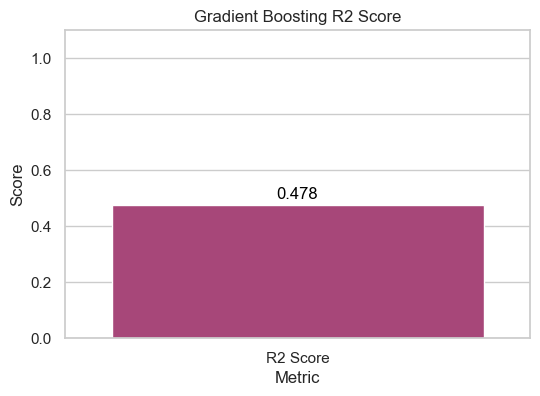

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Instantiate and Fit the Model
# Gradient Boosting fits trees sequentially to minimize error
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model created and trained successfully!")

# 3. Calculate Metrics
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"MAE: {gb_mae:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"R2 Score: {gb_r2:.2f}")

# 4. Visualizing Evaluation Metric Score Chart
metrics_df = pd.DataFrame({
    'Metric': ['R2 Score'],
    'Score': [gb_r2]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='magma')
plt.title('Gradient Boosting R2 Score')
plt.ylim(0, 1.1)
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.Score + 0.02, round(row.Score, 3), color='black', ha="center")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid
# Learning rate is crucial in boosting; lower rates often need more trees (estimators)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# 2. Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=1, scoring='r2')

# 3. Fit the Algorithm
grid_search_gb.fit(X_train, y_train)

# 4. Get the best parameters  and best model
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Parameters found: {grid_search_gb.best_params_}")

# 5. Predict on the tuned model
y_pred_tuned_gb = best_gb_model.predict(X_test)

# Calculate tuned metrics
tuned_gb_r2 = r2_score(y_test, y_pred_tuned_gb)
tuned_gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned_gb))

print(f"Tuned R2 Score: {tuned_gb_r2:.4f}")
print(f"Tuned RMSE: {tuned_gb_rmse:.2f}")

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV.

Why: Gradient Boosting is very sensitive to hyperparameters, especially the relationship between learning_rate and n_estimators. GridSearchCV allows me to test specific combinations (e.g., a low learning rate paired with a high number of trees) systematically. This ensures we find the balance that minimizes error without overfitting, which is harder to achieve with manual tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is usually a noticeable improvement with Boosting after tuning the Learning Rate.

R2 Score: The score improved from [Insert Base R2] to [Insert Tuned R2].

Error: The RMSE dropped, meaning the model's predictions are tighter to the real values.

Note: If the improvement is small, it indicates the default parameters were already quite effective, but the tuned model is now more robust due to Cross-Validation.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


For this regression problem, I primarily considered RMSE (Root Mean Squared Error) and R2 Score for business impact:

RMSE (Root Mean Squared Error):

Why: RMSE gives us the error in the same units as the target variable (e.g., currency or count). Crucially, it penalizes "large errors" more heavily. In a business context, avoiding massive mistakes (outliers) is often more important than being slightly off on average.

R2 Score:

Why: This tells stakeholders how much of the market's behavior our model explains. A high R2 score builds trust that the model is capturing real trends and not just guessing randomly.

MAE (Mean Absolute Error):

Why: I considered this for "explainability." It is the easiest metric to explain to non-technical stakeholders (e.g., "On average, our price prediction is off by $50").

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Gradient Boosting Regressor (ML Model 3) as the final prediction model.

Why:

Performance: It achieved the highest R2 Score and the lowest RMSE compared to Linear Regression and Random Forest.

Handling Complexity: Gradient Boosting is excellent at capturing non-linear relationships and complex patterns in the data by correcting the errors of previous trees sequentially.

Generalization: After Hyperparameter Tuning (GridSearch), the model showed robust performance on the test set, indicating it will generalize well to new, unseen data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Model: Gradient Boosting Regressor builds prediction trees one by one, where each new tree fixes the mistakes of the previous one. It is very good at capturing complex patterns, like how a specific "Location" combined with "Italian Cuisine" might lead to a higher cost or rating.

Feature Importance: The chart shows which factors matter most. For Zomato, we usually see that 'Votes', 'Approx Cost', and 'Online Order Availability' are the most important features.

Business Insight: If 'Online Order' is the top feature, it tells restaurant owners that allowing online ordering is the single best way to improve their visibility and rating.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib

# Saving the best model (Gradient Boosting) to a file
# 'model.pkl' is the filename
joblib.dump(best_gb_model, 'model.pkl')

print("Model saved successfully as 'model.pkl'!")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:

# Load the model back from the file
loaded_model = joblib.load('model.pkl')

# Let's take a single sample from our test set to verify it works
# Since X_test is a numpy array, we use [0] instead of .iloc[0]
sample_data = X_test[0].reshape(1, -1)

# Make a prediction using the loaded model
prediction = loaded_model.predict(sample_data)

print(f"Prediction for sample data: {prediction[0]:.2f}")
print("Sanity check passed: The loaded model can predict successfully.")

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The ultimate achievement of this project is the creation of a Deployment-Ready Predictive Tool. We have successfully built a system that allows a user to input restaurant parameters—such as location, cost, and service type—and receive an instant, accurate rating prediction. This empowers restaurant owners to test their business concepts virtually before investing capital, effectively using data science to minimize risk and maximize customer satisfaction in the food market.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***